# Flight Fare Prediction Problem:

---

- **What is an Air Fare?**<br>
The airfare is the price that you pay to travel on an airplane. The fare may be one-way or round-trip. The price consists of a base fare plus the regular taxes and fees.

- **What are the main types of airfares?**<br>
There are two main types of fares, published airfares and unpublished airfares.

---

**<center>In solution code we'll be using ML Model to predict the Flight Fare based on relevant features.</center>**

---

In [1]:
## importing all required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [2]:
## Loading data...
data_raw = pd.read_excel('Data_Train.xlsx')
data_raw.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
print("Dimensions of raw data is :" , data_raw.shape)

Dimensions of raw data is : (10683, 11)


In [5]:
## Copy raw data for preprocessing...
data = data_raw.copy()

## Exploratory Data Analysis:

In [6]:
dt = data_raw.copy() ## Copy train data for EDA...

#### Airline:

<AxesSubplot:xlabel='count', ylabel='Airline'>

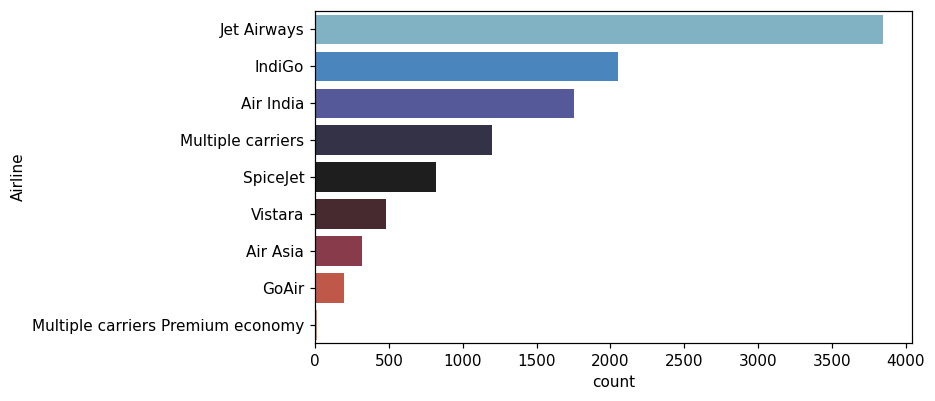

In [7]:
plt.figure(dpi = 110 , figsize = (7,4))
sns.countplot(y = dt['Airline'] , palette = 'icefire' , order = dt['Airline'].value_counts().head(9).index)

- "Jet Airways" is the most highly choosen air service by the people.
- The other 2 major service providers choosen are "Indigo" and "Air India".
- "Trujet" being new in the market is very less choosen.

#### Source:

<AxesSubplot:xlabel='count', ylabel='Source'>

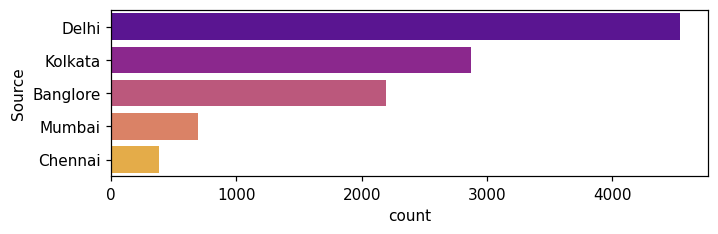

In [8]:
plt.figure(dpi = 110 , figsize = (7,2))
sns.countplot(y = dt['Source'] , palette = 'plasma' , order = dt['Source'].value_counts().index)

- Majority of flights start from **"Delhi" and "Kolkata"**.

#### Destination:

<AxesSubplot:xlabel='count', ylabel='Destination'>

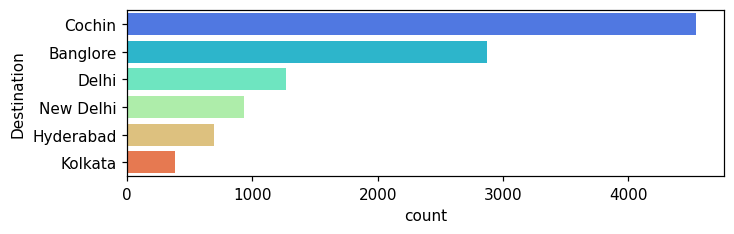

In [9]:
plt.figure(dpi = 110 , figsize = (7,2))
sns.countplot(y = dt['Destination'] , palette = 'rainbow' , order = dt['Destination'].value_counts().index)

- Majority of flights are landed in **"Cochin" and "Bangalore"**.

#### Total Number of stops in a journey:

<AxesSubplot:xlabel='count', ylabel='Total_Stops'>

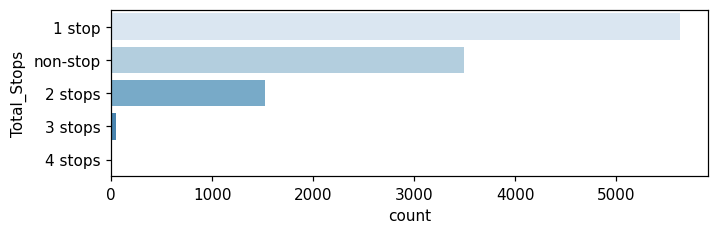

In [10]:
plt.figure(dpi = 110 , figsize = (7,2))
sns.countplot(y = dt['Total_Stops'] , palette = 'Blues' , order = dt['Total_Stops'].value_counts().index)

- Majority of flights take ony **1 Stop** during the journey.
- Also there are many flights which go non-stop. Most of these flight are short distance flights.

## Feature Engineering:

##### Flight Duration:

In [11]:
## Creating new feature based on "Duration" Variable.....
## In updated feature only Duration of flight in minutes will be mentioned....
data['Duration_in_mins_updated'] = data['Duration'].astype('str')

for i in range(data.shape[0]):
    temp = data['Duration_in_mins_updated'][i]
    temp = temp.split()
    if len(temp) == 2:
        temp1 = temp[0]
        temp2 = temp[1]
        cont = int(temp1[:-1])*60 + int(temp2[:-1])
        data['Duration_in_mins_updated'][i] = str(cont)
    elif len(temp) == 1:
        temp1 = temp[0]
        cont = int(temp1[:-1])*60
        data['Duration_in_mins_updated'][i] = str(cont)
        
data['Duration_in_mins_updated'] = data['Duration_in_mins_updated'].astype('int64')

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


##### Flight Route:

In [12]:
## Creating new feature based on "Route" Variable.....
## In updated feature only Source and Destination airport will be mentioned....
data['Route_updated'] = data['Route'].astype('str')

for i in range(data.shape[0]):
    temp = data['Route_updated'][i]
    temp1 = temp[0:5]
    temp2 = temp[-3:]
    temp = temp1 + temp2
    data['Route_updated'][i] = temp

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


##### Date of Journey:

In [13]:
## here we converting the Date Column to time stamp Format. so, that we can extract information...
## We'll be needing the weekday info. which we'll get from here.....
dates = pd.to_datetime(data['Date_of_Journey'] , format = '%d/%m/%Y')
data['Date_of_Journey'] = dates

## Creating the list of weekdays from the given dates....
weekdays = []

for i in range(data.shape[0]):
    weekdays.append(data['Date_of_Journey'][i].weekday())

## adding the created list to data frame....
data['Weekday_of_journey'] = weekdays

### Dropping Null Entries:

In [14]:
## We have only 2 NAN entries in our data....
## We'll apply foreward fill technique to not loose that data points....
data = data.fillna(method = 'ffill')

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_in_mins_updated,Route_updated,Weekday_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,BLR →DEL,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,CCU →BLR,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,DEL →COK,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,CCU →BLR,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,BLR →DEL,4


### Creating Dummy Variables for Categorical Features:

In [16]:
cate = pd.get_dummies(data[['Airline' , 'Source' , 'Destination' , 'Route_updated' , 'Total_Stops']] , drop_first = True)
cate.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Route_updated_BOM →HYD,Route_updated_CCU →BLR,Route_updated_DEL →COK,Route_updated_MAA →CCU,Route_updated_nannan,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
## Merging all the "cate" in main data frame...
data = pd.concat([data , cate] , axis = 1)

### Dropping Unwanted Features:

In [18]:
data_preprocessed = data.drop(['Airline', 'Source', 'Destination', 'Date_of_Journey', 'Route', 'Route_updated', 'Dep_Time', 
                               'Arrival_Time', 'Total_Stops', 'Duration', 'Additional_Info'] , axis = 1)

In [19]:
data_preprocessed.head()

,Price,Duration_in_mins_updated,Weekday_of_journey,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_New Delhi,Route_updated_BOM →HYD,Route_updated_CCU →BLR,Route_updated_DEL →COK,Route_updated_MAA →CCU,Route_updated_nannan,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,170,6,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,7662,445,2,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,13882,1140,6,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,6218,325,6,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,13302,285,4,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Model:

In [20]:
## Train Test Split....
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data_preprocessed.drop('Price' , axis = 1) , data_preprocessed['Price'] 
                                                       , test_size = 0.2 , random_state = 23)

### Random Forest Regressor:

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [22]:
## Apply Hyperparameter Tunning....
from sklearn.model_selection import GridSearchCV

n_estimators = [100 , 150 , 200 , 250]
criterion = ["mse"]
max_depth = [5 , 7 , 9 , 11]
min_samples_split = [int(x) for x in np.linspace(2 , 10 , 5)]
min_samples_leaf = [int(x) for x in np.linspace(2 , 10 , 5)]
max_features = ["auto", "sqrt"]
max_leaf_nodes = [int(x) for x in np.linspace(10 , 40 , 5)]


para_dics = {'n_estimators':n_estimators , 'criterion':criterion , 'max_depth':max_depth , 
             'min_samples_split':min_samples_split , 'min_samples_leaf':min_samples_leaf , 'max_features':max_features , 
            'max_leaf_nodes':max_leaf_nodes}

In [23]:
grid_search = GridSearchCV(estimator = rf_reg, param_grid = para_dics , scoring='neg_mean_squared_error', 
                           cv=2, n_jobs=-1 , verbose=2)
grid_search.fit(x_train , y_train)

Fitting 2 folds for each of 4000 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | 

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [10, 17, 25, 32, 40],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
print("Best Parameters are:\n" , grid_search.best_params_)
print("\nBest Score obtained:" , grid_search.best_score_)

Best Parameters are:
 {'criterion': 'mse', 'max_depth': 9, 'max_features': 'auto', 'max_leaf_nodes': 40, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}

Best Score obtained: -7673503.902059046


In [25]:
estmator_1 = grid_search.best_estimator_
print("Train Accuracy of Hyper tunned model:" , estmator_1.score(x_train , y_train))
print("Test Accuracy of Hyper tunned model:" , estmator_1.score(x_test , y_test))
print("\nRMSE of train data is :" , np.sqrt(metrics.mean_squared_error(y_train , estmator_1.predict(x_train))))
print("RMSE of test data is :" , np.sqrt(metrics.mean_squared_error(y_test , estmator_1.predict(x_test))))

Train Accuracy of Hyper tunned model: 0.6986445465538357
Test Accuracy of Hyper tunned model: 0.6485630651553579

RMSE of train data is : 2528.382673807783
RMSE of test data is : 2746.027635921811


(0.0, 60000.0)

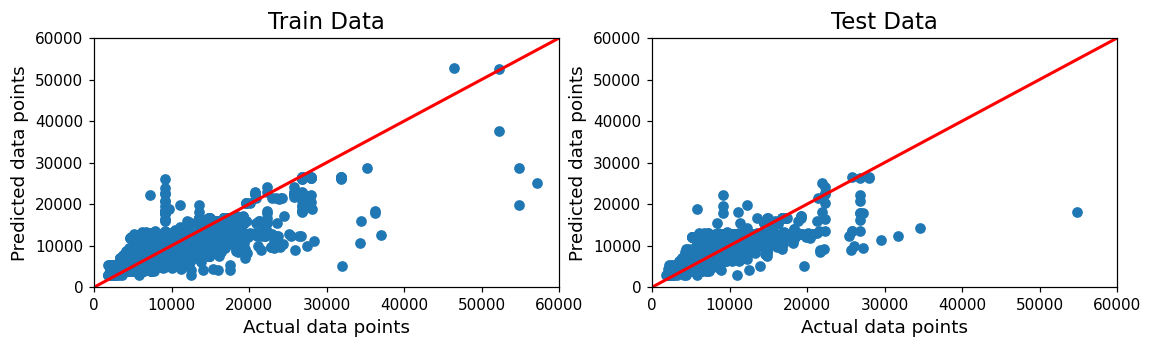

In [26]:
## plotting Train data....
## More concentration on red line -> More the model accuracy.
plt.figure(dpi = 110 , figsize = (12 , 3))
plt.subplot(1,2,1)
plt.scatter(x = y_train , y = estmator_1.predict(x_train))
plt.plot([0, 60000] , [0 , 60000] , '-' , linewidth=2 , color = 'r')
plt.title("Train Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 60000)
plt.ylim(0 , 60000)

## plotting Test results....
## More concentration on red line -> More the model accuracy.
plt.subplot(1,2,2)
plt.scatter(x = y_test , y = estmator_1.predict(x_test))
plt.plot([0, 60000] , [0 , 60000] , '-' , linewidth=2 , color = 'r')
plt.title("Test Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 60000)
plt.ylim(0 , 60000)

---

### Gradient Boosting Regressor:

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()

In [28]:
## Apply Hyperparameter Tunning....
from sklearn.model_selection import GridSearchCV

learning_rate = [0.1 , 0.05]
n_estimators = [350 , 400 , 450 , 500 , 550]
criterion = ['friedman_mse', 'mse']
max_depth = [5 , 7 , 9 , 11 , 12]
max_features = ["auto", "sqrt"]
max_leaf_nodes = [int(x) for x in np.linspace(10 , 40 , 5)]

para_dics_gb = {'learning_rate':learning_rate , 'n_estimators':n_estimators , 'criterion':criterion , 'max_depth':max_depth , 
                'max_features':max_features , 'max_leaf_nodes':max_leaf_nodes}

In [29]:
grid_search_gb = GridSearchCV(estimator = gb_reg, param_grid = para_dics_gb , scoring='neg_mean_squared_error', 
                           cv=2, n_jobs=-1 , verbose=2)
grid_search_gb.fit(x_train , y_train)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 13.6min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.05],
                         'max_depth': [5, 7, 9, 11, 12],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [10, 17, 25, 32, 40],
                         'n_estimators': [350, 400, 450, 500, 550]},
             scoring='neg_mean_squared_error', verbose=2)

In [30]:
print("Best Parameters are:" , grid_search_gb.best_params_)
print("\nBest Score obtained:" , grid_search_gb.best_score_)

Best Parameters are: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'n_estimators': 550}

Best Score obtained: -6379786.628283859


In [31]:
estmator_2 = grid_search_gb.best_estimator_
print("Train Accuracy of Hyper tunned model:" , estmator_2.score(x_train , y_train))
print("Test Accuracy of Hyper tunned model:" , estmator_2.score(x_test , y_test))
print("\nRMSE of train data is :" , np.sqrt(metrics.mean_squared_error(y_train , estmator_2.predict(x_train))))
print("RMSE of test data is :" , np.sqrt(metrics.mean_squared_error(y_test , estmator_2.predict(x_test))))

Train Accuracy of Hyper tunned model: 0.7700068547413219
Test Accuracy of Hyper tunned model: 0.69111461087803

RMSE of train data is : 2208.8220256310556
RMSE of test data is : 2574.4228728540943


(0.0, 60000.0)

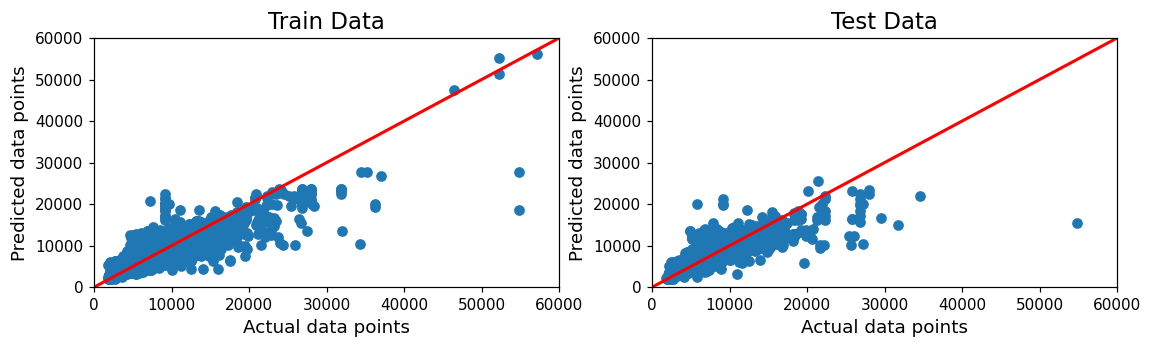

In [32]:
## plotting Train data....
## More concentration on red line -> More the model accuracy.
plt.figure(dpi = 110 , figsize = (12 , 3))
plt.subplot(1,2,1)
plt.scatter(x = y_train , y = estmator_2.predict(x_train))
plt.plot([0, 60000] , [0 , 60000] , '-' , linewidth=2 , color = 'r')
plt.title("Train Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 60000)
plt.ylim(0 , 60000)

## plotting Test results....
## More concentration on red line -> More the model accuracy.
plt.subplot(1,2,2)
plt.scatter(x = y_test , y = estmator_2.predict(x_test))
plt.plot([0, 60000] , [0 , 60000] , '-' , linewidth=2 , color = 'r')
plt.title("Test Data" , fontsize = 15)
plt.xlabel("Actual data points" , fontsize = 12)
plt.ylabel("Predicted data points" , fontsize = 12)
plt.xlim(0 , 60000)
plt.ylim(0 , 60000)

---
### We can adopt Gradient Boosting  Regression Technique for its improved performance.

---